In [17]:
# imports
from cobra.io import load_model

In [6]:
# Contains the main steps of the BayesOpt
%run BayesOpt_MOBO_II.ipynb

In [ ]:
# Plotting functions to be used across notebooks
%run Figure1C_Plotting.ipynb

In [ ]:
# imports for .py version
#from BayesOpt_MOBO_II import *
#from Figure1C import *

# Models & Media

## Load & Define

### Model

In [7]:
# load textbook
model_textbook = load_model("textbook")
medium_textbook = model_textbook.medium
print(model_textbook)

e_coli_core


### Media

In [ ]:
# textbook
bounds_textbook = {
    'EX_co2_e': (0.0, 10), # not in medium_iJO1366_enriched
    'EX_glc__D_e': (1, 10), 
    'EX_h_e': (0.0, 10), # not in medium_iJO1366_enriched
    'EX_h2o_e': (0.0, 10), # not in medium_iJO1366_enriched
    'EX_nh4_e': (0.0, 10),
    'EX_o2_e': (0.0, 20),
    'EX_pi_e': (0.0, 50)
}
costs_textbook = {
    'EX_co2_e': 0.00, # CO2 - undetermined costs
    'EX_glc__D_e': 7.76, # Glucose
    'EX_h_e': 0.00, # Hydrogen - undetermined costs
    'EX_h2o_e': 0.00, # water - undetermined costs
    'EX_nh4_e': 3.6748, # Ammonia - NH4Cl
    'EX_o2_e': 0.00, # oxygen - undetermined costs
    'EX_pi_e': 23.4234, # Phosphate - approximate (several sources)
}
print(model_textbook.objective)

# Optimisation

## Set-Up

In [10]:
# set n_iter and date to be used in all calls and names
date = "2025-07-02"
rounds = 1 # how often should the algorithm run
n_start = 30 # how many random media compositions to initialise the algorithm
n_iter = 30 # how many iterations per run
iterations = str(n_iter)
n_candidates = 10 # batch size

biomass_rxn_id = "Biomass_Ecoli_core"
protein_rxn_id = None
AF_type = "qPAREGO"
#AF_type = "qNEHVI"

# set medium
medium = medium_textbook
bounds = bounds_textbook
costs = costs_textbook

## Running Growth-Cost

Round:	 1  of  1


c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Iteration:	 10


c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Iteration:	 20


c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Iteration:	 30


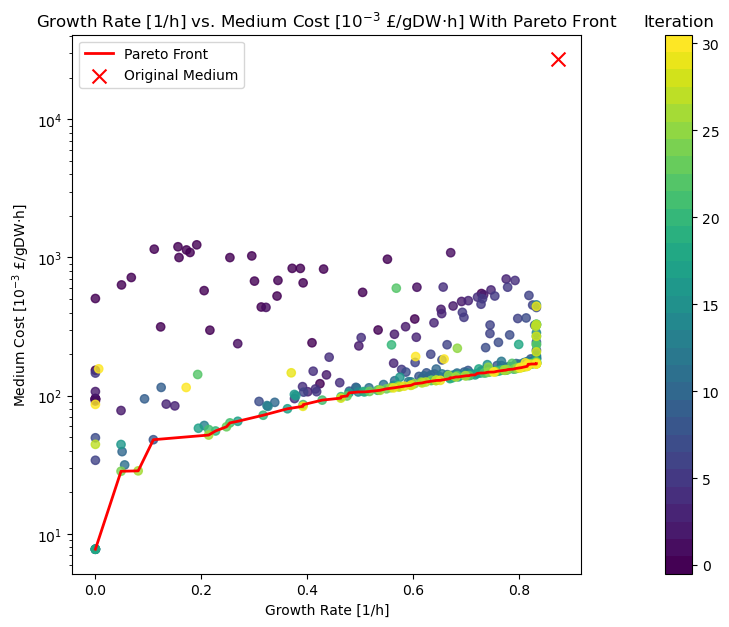

In [12]:
opt_objective = "growth-cost"

for r in range(rounds):
    runde = str(r+1)
    print("Round:\t", runde, " of ", rounds)
    results_textbook = media_BayesOpt(
        model_textbook,
        medium,
        bounds,
        costs,
        opt_objective,
        biomass_rxn_id,
        protein_rxn_id,
        AF_type,
        n_start = n_start, 
        n_iter = n_iter,
        n_candidates = n_candidates,
        model_objective = model_textbook.objective)
    
    # plot & save results
    basename = (date + "_BayesOpt_textbook_" + opt_objective + "_" +
                AF_type + "_" + iterations + "it_round_" + runde)
    
    # store results in JSON file
    JSON_serialize_store_results(results_textbook, basename)

    plot_pareto_batch_colour(
        results = results_textbook,
        figname = (basename + "_pareto_batch_colour.png"),
        MetModel = model_textbook,
        initial_medium = medium,
        initial_costs = costs
    )

## Plot

In [69]:
# Plotting functions to be used across notebooks
%run Figure1C.ipynb

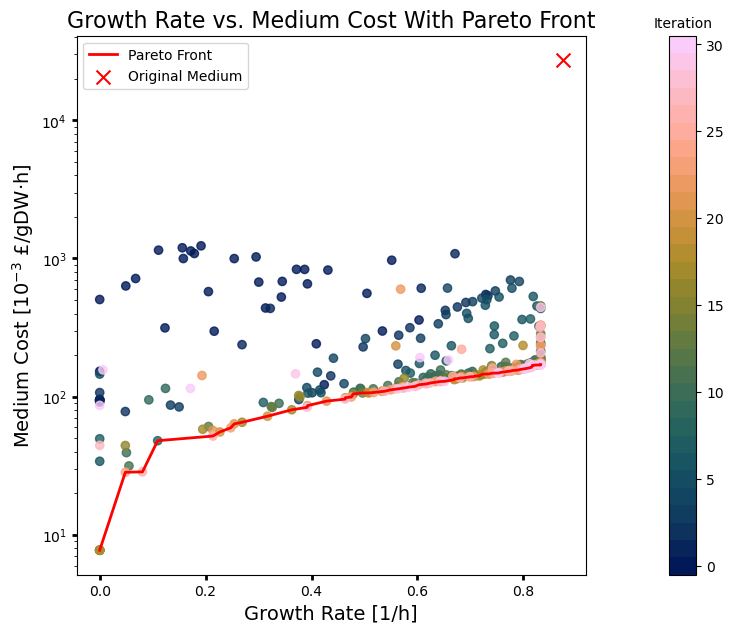

In [70]:
plot_pareto_batch_colour(
        results = results_textbook,
        figname = (basename + "_pareto_batch_colour.png"),
        MetModel = model_textbook,
        initial_medium = medium,
        initial_costs = costs
    )